In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

C:\Users\Jordan Lesniak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nhlgame = pd.read_csv('all_teams.csv')
nhlgame

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,...,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,...,20.0,19.369,3.0,0.237,0.168,0.168,1.862,1.777,1.665,0
3,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,4on5,...,9.0,9.000,1.0,0.124,0.000,0.000,0.795,0.795,0.789,0
4,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on4,...,1.0,1.000,1.0,0.019,0.000,0.000,0.224,0.224,0.224,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171700,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,other,...,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1
171701,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,all,...,34.0,36.654,8.0,0.320,0.285,0.285,1.853,2.012,1.976,1
171702,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,5on5,...,32.0,34.654,7.0,0.299,0.285,0.285,1.814,1.972,1.937,1
171703,L.A,2017,L.A,2017030174,L.A,VGK,HOME,20180417,Team Level,4on5,...,2.0,2.000,0.0,0.021,0.000,0.000,0.040,0.040,0.040,1


In [3]:
#Cleaning the dataframe to only have the entire game for one row and sorting by date of game
nhl_clean = nhlgame[(nhlgame['situation'] == 'all')]
nhl_clean_ordered = nhl_clean.sort_values('gameDate')
nhl_clean_ordered.reset_index(inplace = True)
nhl_clean_ordered = nhl_clean_ordered.drop('index', axis = 1)
nhl_clean_ordered

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
1,PIT,2008,PIT,2008020002,PIT,OTT,AWAY,20081004,Team Level,all,...,47.0,45.987,10.0,0.481,0.060,0.060,3.039,2.961,2.915,0
2,T.B,2008,T.B,2008020001,T.B,NYR,HOME,20081004,Team Level,all,...,53.0,54.697,4.0,0.641,0.014,0.029,2.899,3.030,2.980,0
3,OTT,2008,OTT,2008020002,OTT,PIT,HOME,20081004,Team Level,all,...,43.0,44.352,10.0,0.449,0.000,0.000,2.724,2.823,2.794,0
4,NYR,2008,NYR,2008020003,NYR,T.B,HOME,20081005,Team Level,all,...,32.0,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34336,NYI,2021,NYI,2021020943,NYI,ANA,HOME,20220313,Team Level,all,...,50.0,48.872,5.0,0.575,1.847,1.847,2.744,2.739,2.699,0
34337,MIN,2021,MIN,2021020948,MIN,NSH,HOME,20220313,Team Level,all,...,38.0,40.054,0.0,0.404,0.823,0.823,4.359,4.441,4.431,0
34338,TOR,2021,TOR,2021020942,TOR,BUF,AWAY,20220313,Team Level,all,...,47.0,46.504,8.0,0.498,0.287,0.287,4.109,4.023,3.983,0
34339,NSH,2021,NSH,2021020948,NSH,MIN,AWAY,20220313,Team Level,all,...,41.0,38.845,2.0,0.369,0.000,0.000,1.941,1.843,1.803,0


In [4]:
win = []
tie = []
i = -1
no_ties_df = nhl_clean_ordered
for home, away in zip(no_ties_df['goalsFor'], no_ties_df['goalsAgainst']):
    i += 1
    if home > away:
        win.append(1)
    if away > home:
        win.append(0)
    if home == away:
        tie.append(no_ties_df.index[i])
        #no_ties_df = no_ties_df.drop(labels = i)
                   
print(len(win))
print(len(nhl_clean_ordered))
print(len(tie))
#this cell counts the number of games that are tied so we can drop those from the dataframe

30862
34341
3479


In [10]:
#no_ties_df = no_ties_df.drop(tie)  #only used once then commented out
#no_ties_df.insert(loc = 0, column = 'won', value = win) #only used once then commented out
final_df = no_ties_df ##new dataframe that takes out every game that ends in a tie, since NHL games can no longer end in a tie.
final_df

,won,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
1,1,PIT,2008,PIT,2008020002,PIT,OTT,AWAY,20081004,Team Level,...,47.0,45.987,10.0,0.481,0.060,0.060,3.039,2.961,2.915,0
2,0,T.B,2008,T.B,2008020001,T.B,NYR,HOME,20081004,Team Level,...,53.0,54.697,4.0,0.641,0.014,0.029,2.899,3.030,2.980,0
3,0,OTT,2008,OTT,2008020002,OTT,PIT,HOME,20081004,Team Level,...,43.0,44.352,10.0,0.449,0.000,0.000,2.724,2.823,2.794,0
4,1,NYR,2008,NYR,2008020003,NYR,T.B,HOME,20081005,Team Level,...,32.0,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34335,1,COL,2021,COL,2021020949,COL,CGY,HOME,20220313,Team Level,...,58.0,56.468,3.0,0.638,0.573,0.573,2.467,2.470,2.392,0
34336,1,NYI,2021,NYI,2021020943,NYI,ANA,HOME,20220313,Team Level,...,50.0,48.872,5.0,0.575,1.847,1.847,2.744,2.739,2.699,0
34337,0,MIN,2021,MIN,2021020948,MIN,NSH,HOME,20220313,Team Level,...,38.0,40.054,0.0,0.404,0.823,0.823,4.359,4.441,4.431,0
34338,0,TOR,2021,TOR,2021020942,TOR,BUF,AWAY,20220313,Team Level,...,47.0,46.504,8.0,0.498,0.287,0.287,4.109,4.023,3.983,0


In [12]:
final_dropped_df = final_df.drop(['team', 'season', 'name', 'gameId', 'playerTeam', 'opposingTeam',
       'home_or_away', 'gameDate', 'position', 'situation', 'iceTime', 'goalsFor', 'goalsAgainst'], axis = 1)
final_dropped_df

,won,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,1,0.4596,0.6408,0.6310,37.733,2.287,2.842,8.155,1.134,22.530,...,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
1,1,0.4720,0.5246,0.4778,29.868,2.340,1.964,6.946,0.929,17.069,...,47.0,45.987,10.0,0.481,0.060,0.060,3.039,2.961,2.915,0
2,0,0.5404,0.3592,0.3690,22.880,2.689,1.780,4.436,0.639,12.626,...,53.0,54.697,4.0,0.641,0.014,0.029,2.899,3.030,2.980,0
3,0,0.5280,0.4754,0.5222,33.901,2.618,2.107,8.056,1.099,18.369,...,43.0,44.352,10.0,0.449,0.000,0.000,2.724,2.823,2.794,0
4,1,0.6619,0.6207,0.6190,34.277,1.793,1.872,9.068,1.722,19.788,...,32.0,31.984,5.0,0.241,0.000,0.000,1.091,1.117,1.091,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34335,1,0.5510,0.4795,0.4630,35.047,2.948,2.161,8.328,1.135,20.808,...,58.0,56.468,3.0,0.638,0.573,0.573,2.467,2.470,2.392,0
34336,1,0.3920,0.4138,0.4118,25.134,2.589,1.690,5.722,0.745,13.545,...,50.0,48.872,5.0,0.575,1.847,1.847,2.744,2.739,2.699,0
34337,0,0.2475,0.5833,0.5190,28.292,1.572,1.712,6.807,0.947,17.175,...,38.0,40.054,0.0,0.404,0.823,0.823,4.359,4.441,4.431,0
34338,0,0.5239,0.5714,0.5392,40.073,4.290,2.726,8.758,1.260,21.095,...,47.0,46.504,8.0,0.498,0.287,0.287,4.109,4.023,3.983,0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(final_dropped_df.drop('won', axis = 1))
scaled_feat = scaler.transform(final_dropped_df.drop('won', axis = 1))
df_feat = pd.DataFrame(scaled_feat, columns = final_dropped_df.columns[1:])
df_feat.head()

,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,-0.345138,1.782697,1.627362,1.218332,-0.511864,1.562458,0.869458,0.688349,1.547085,1.350979,...,-1.250120,-1.348684,-0.015430,-0.494817,-0.686791,-0.707619,0.227183,0.117893,0.052520,-0.287884
1,-0.239213,0.311411,-0.275831,-0.018209,-0.455169,-0.181687,0.085906,-0.217965,0.085205,0.127960,...,0.579923,0.462062,1.329769,0.237882,-0.930365,-0.948791,0.373886,0.270491,0.304760,-0.287884
2,0.345085,-1.782829,-1.627446,-1.116867,-0.081843,-0.547203,-1.540822,-1.500068,-1.104162,-1.377584,...,1.266189,1.471897,-0.284470,1.617081,-1.034109,-1.018017,0.205538,0.352750,0.386330,-0.287884
3,0.239160,-0.311543,0.275747,0.615863,-0.157792,0.102382,0.805296,0.533612,0.433208,0.858825,...,0.122413,0.272501,1.329769,-0.037957,-1.065684,-1.082776,-0.004897,0.105972,0.152914,-0.287884
4,1.382983,1.528197,1.478287,0.674978,-1.040297,-0.364445,1.461172,3.287923,0.813067,1.994216,...,-1.135742,-1.161441,-0.015430,-1.830915,-1.065684,-1.082776,-1.968556,-1.927864,-1.984220,-0.287884


# Feature Selection

In [15]:
final_dropped_df.var()

won                                           0.250008
xGoalsPercentage                              0.013704
corsiPercentage                               0.006238
fenwickPercentage                             0.006480
xOnGoalFor                                   40.457079
                                               ...    
reboundxGoalsAgainst                          0.200543
totalShotCreditAgainst                        0.691599
scoreAdjustedTotalShotCreditAgainst           0.703624
scoreFlurryAdjustedTotalShotCreditAgainst     0.635009
playoffGame                                   0.070679
Length: 99, dtype: float64

## Finding Columns to delete based on low variance

In [16]:
count = 0
other = 0
cols_del = []
for var, name in zip(final_dropped_df.var(), final_dropped_df.keys()):
    if var < .1: #change this up or down to delete more or less features solely on variance alone
        count += 1
        cols_del.append(name)
    else:
        other += 1

print(len(cols_del),count, other)

10 10 89


In [17]:
final_df1 = final_dropped_df.drop(columns=cols_del)
final_df1

,won,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,...,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
0,1,37.733,2.287,2.842,8.155,22.530,16.054,2.249,2.396,2.357,...,0.0,36.140,31.0,30.369,5.0,0.168,0.168,2.917,2.833,2.714
1,1,29.868,2.340,1.964,6.946,17.069,12.816,2.325,2.424,2.407,...,0.0,56.681,47.0,45.987,10.0,0.060,0.060,3.039,2.961,2.915
2,0,22.880,2.689,1.780,4.436,12.626,8.830,2.524,2.607,2.450,...,1.0,68.292,53.0,54.697,4.0,0.014,0.029,2.899,3.030,2.980
3,0,33.901,2.618,2.107,8.056,18.369,14.751,2.577,2.553,2.513,...,1.0,65.926,43.0,44.352,10.0,0.000,0.000,2.724,2.823,2.794
4,1,34.277,1.793,1.872,9.068,19.788,17.757,1.744,1.752,1.704,...,0.0,44.339,32.0,31.984,5.0,0.000,0.000,1.091,1.117,1.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34335,1,35.047,2.948,2.161,8.328,20.808,14.619,2.933,2.941,2.926,...,0.0,73.979,58.0,56.468,3.0,0.573,0.573,2.467,2.470,2.392
34336,1,25.134,2.589,1.690,5.722,13.545,10.708,2.519,2.588,2.517,...,3.0,65.837,50.0,48.872,5.0,1.847,1.847,2.744,2.739,2.699
34337,0,28.292,1.572,1.712,6.807,17.175,12.787,1.540,1.493,1.462,...,5.0,52.790,38.0,40.054,0.0,0.823,0.823,4.359,4.441,4.431
34338,0,40.073,4.290,2.726,8.758,21.095,16.871,4.156,4.449,4.307,...,1.0,53.189,47.0,46.504,8.0,0.287,0.287,4.109,4.023,3.983


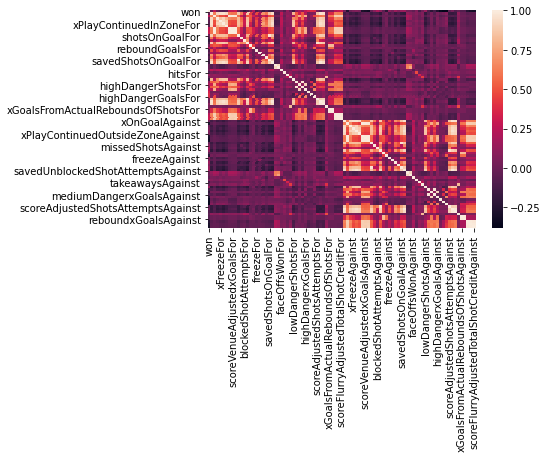

In [18]:
sns.heatmap(final_df1.corr())

In [19]:
abs(final_df1.corr()['won']) > 0.5


won                                           True
xOnGoalFor                                   False
xGoalsFor                                    False
xReboundsFor                                 False
xFreezeFor                                   False
                                             ...  
xGoalsFromActualReboundsOfShotsAgainst       False
reboundxGoalsAgainst                         False
totalShotCreditAgainst                       False
scoreAdjustedTotalShotCreditAgainst          False
scoreFlurryAdjustedTotalShotCreditAgainst    False
Name: won, Length: 89, dtype: bool

# Feature Selection using a Wrapper

In [20]:
#!pip install mlxtend

In [21]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_dropped_df.drop('won', axis = 1))
scaled_feat = scaler.transform(final_dropped_df.drop('won', axis = 1))
df_feat = pd.DataFrame(scaled_feat, columns = final_dropped_df.columns[1:])
df_feat

,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,...,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,-0.345138,1.782697,1.627362,1.218332,-0.511864,1.562458,0.869458,0.688349,1.547085,1.350979,...,-1.250120,-1.348684,-0.015430,-0.494817,-0.686791,-0.707619,0.227183,0.117893,0.052520,-0.287884
1,-0.239213,0.311411,-0.275831,-0.018209,-0.455169,-0.181687,0.085906,-0.217965,0.085205,0.127960,...,0.579923,0.462062,1.329769,0.237882,-0.930365,-0.948791,0.373886,0.270491,0.304760,-0.287884
2,0.345085,-1.782829,-1.627446,-1.116867,-0.081843,-0.547203,-1.540822,-1.500068,-1.104162,-1.377584,...,1.266189,1.471897,-0.284470,1.617081,-1.034109,-1.018017,0.205538,0.352750,0.386330,-0.287884
3,0.239160,-0.311543,0.275747,0.615863,-0.157792,0.102382,0.805296,0.533612,0.433208,0.858825,...,0.122413,0.272501,1.329769,-0.037957,-1.065684,-1.082776,-0.004897,0.105972,0.152914,-0.287884
4,1.382983,1.528197,1.478287,0.674978,-1.040297,-0.364445,1.461172,3.287923,0.813067,1.994216,...,-1.135742,-1.161441,-0.015430,-1.830915,-1.065684,-1.082776,-1.968556,-1.927864,-1.984220,-0.287884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30857,0.435634,-0.259630,-0.459690,0.796038,0.195210,0.209653,0.981579,0.692770,1.086115,0.808968,...,1.838078,1.677226,-0.553509,1.591221,0.226609,0.196778,-0.313936,-0.314863,-0.351565,-0.287884
30858,-0.922602,-1.091502,-1.095745,-0.762491,-0.188813,-0.725988,-0.707367,-1.031437,-0.858150,-0.668248,...,0.923056,0.796548,-0.015430,1.048161,3.099875,3.041718,0.019153,0.005830,0.033696,-0.287884
30859,-2.156975,1.054651,0.235994,-0.265988,-1.276702,-0.682285,-0.004180,-0.138386,0.113581,0.117007,...,-0.449476,-0.225808,-1.360629,-0.425857,0.790437,0.755047,1.961167,2.034897,2.207223,-0.287884
30860,0.204136,0.903977,0.486937,1.586229,1.630752,1.332024,1.260261,1.245400,1.162943,1.659567,...,0.579923,0.522003,0.791689,0.384422,-0.418409,-0.441883,1.660546,1.536571,1.645017,-0.287884


In [24]:
from sklearn.model_selection import train_test_split
X = final_df1.drop(['won'], axis=1)[0:100]
#X = df_feat#[0:300]
y = final_dropped_df['won'][0:100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
print(np.shape(X))

(1000, 88)


In [25]:
###Using RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

'''
select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select=37)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

selected_features = select.get_feature_names_out()
print(selected_features,'\n', len(selected_features))
'''

"\nselect = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select=37)\nselect.fit(X_train, y_train)\nX_train_selected = select.transform(X_train)\n\nprint('X_train.shape: {}'.format(X_train.shape))\nprint('X_train_selected.shape: {}'.format(X_train_selected.shape))\n\nselected_features = select.get_feature_names_out()\nprint(selected_features,'\n', len(selected_features))\n"

In [26]:
'''
X_test_selected = select.transform(X_test)

model = RandomForestClassifier(n_estimators = 100, random_state = 42)

model.fit(X_train, y_train)
print('Score with all features: {:.3f}'.format(model.score(X_test, y_test)))

model.fit(X_train_selected, y_train)
print('Score with selected features: {:.3f}'.format(model.score(X_test_selected, y_test)))

y_pred = model.predict(X_test_selected)
'''


"\nX_test_selected = select.transform(X_test)\n\nmodel = RandomForestClassifier(n_estimators = 100, random_state = 42)\n\nmodel.fit(X_train, y_train)\nprint('Score with all features: {:.3f}'.format(model.score(X_test, y_test)))\n\nmodel.fit(X_train_selected, y_train)\nprint('Score with selected features: {:.3f}'.format(model.score(X_test_selected, y_test)))\n\ny_pred = model.predict(X_test_selected)\n"

In [27]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

SVR1 = SVR(kernel="linear")
SVC = SVC(kernel = 'rbf', decision_function_shape='ovo')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier(random_state=42)
LRcv = LogisticRegressionCV(cv=5, random_state=42)
MLP = MLPClassifier(random_state=42, max_iter=300)
RCcv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
RC = RidgeClassifier()
LR = LinearRegression()
logr = LogisticRegression()
XTC = ExtraTreesClassifier(random_state = 42)
KNC = KNeighborsClassifier(n_neighbors = 4)
GBC = GradientBoostingClassifier()

In [36]:
##########################################################################
#Function to Optimize amount of features Used using RFE

#Returns Dictionary of all Scores with all possible number of features
##########################################################################
from sklearn.tree import DecisionTreeClassifier


def feature_select(num_total_features, Xtrain = X_train, ytrain = y_train, Xtest = X_test, ytest = y_test,
                   classifier = RandomForestClassifier, rand_state = 42):
    
    score_dict = {}
    start_score = 0
    
    for i in range(num_total_features):
        print(i)
        if i == 0:
            continue
        select = RFE(classifier, n_features_to_select=i)
        select.fit(Xtrain, ytrain)
        Xtrain_selected = select.transform(Xtrain)

        #print('X_train.shape: {}'.format(Xtrain.shape))
        #print('X_train_selected.shape: {}'.format(Xtrain_selected.shape))

        Xtest_selected = select.transform(Xtest)
        
        model = classifier

        model.fit(Xtrain_selected, y_train)
        #print('Score with selected features: {:.3f}'.format(model.score(Xtest_selected, ytest)))
        score = model.score(Xtest_selected, ytest)
        #y_pred = model.predict(Xtest_selected)
        
        score_dict[i] = score
        
        if score > start_score:
            start_score = score
            selected_features = select.get_feature_names_out()
            selected_rank = select.ranking_

            
    return score_dict, selected_features, selected_rank

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

dtcscore, dtcfeatures, dtcrank = feature_select(num_total_features = 88, classifier = DTC)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


In [39]:
print(max(dtcscore.values()))
print(dtcfeatures)
dtcrank

0.86
['lowDangerGoalsFor' 'highDangerGoalsFor' 'lowDangerGoalsAgainst'
 'mediumDangerGoalsAgainst' 'highDangerGoalsAgainst']


array([83, 82, 81, 80, 79, 75, 74, 73, 72, 71, 69, 14, 23, 40, 39, 17, 32,
       35, 31, 13, 27, 38, 47, 28, 55, 51, 78, 46, 54,  9, 16,  4,  1,  2,
        1,  6, 84, 25, 59, 24, 34, 36, 62, 48, 56, 60, 76, 77, 64, 66, 70,
       65, 19, 53, 52,  8, 49, 37, 45, 11, 33, 26, 22, 29, 30, 10, 21, 67,
        7, 12, 15, 68, 20, 43, 44,  5,  1,  1,  1, 58, 61, 50, 42, 57, 41,
       18,  3, 63])

In [40]:
xtcscore, xtcfeatures, xtcrank = feature_select(num_total_features = 88, classifier = XTC)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


In [43]:
print(max(xtcscore.values()))
print(xtcfeatures)
xtcrank

0.98
['flurryScoreVenueAdjustedxGoalsFor' 'lowDangerGoalsFor'
 'mediumDangerGoalsFor' 'highDangerGoalsFor' 'lowDangerGoalsAgainst'
 'mediumDangerGoalsAgainst' 'highDangerGoalsAgainst'
 'scoreAdjustedTotalShotCreditAgainst']


array([47, 13, 71, 75, 57, 69,  7,  3,  1, 80, 32, 24, 41, 48, 17, 43, 67,
       21, 42, 18, 12, 50, 49, 36, 64, 65, 28, 79, 25, 38, 53, 16,  1,  1,
        1, 29, 59, 56, 52, 68, 45, 19,  9,  5, 62, 20, 46, 51, 78, 81, 11,
        6,  4, 70, 73, 31, 74, 30, 23, 66, 58, 22, 76, 10,  8, 33, 61, 55,
       44, 35, 39, 40, 37, 27, 54, 15,  1,  1,  1, 26, 77, 34, 60, 63, 72,
       14,  1,  2])

In [44]:
select_df = final_df1[xtcfeatures]
select_df

,flurryScoreVenueAdjustedxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedTotalShotCreditAgainst
0,2.357,1.0,0.0,1.0,1.0,0.0,0.0,2.833
1,2.407,2.0,1.0,1.0,2.0,1.0,0.0,2.961
2,2.450,1.0,0.0,0.0,1.0,0.0,1.0,3.030
3,2.513,2.0,1.0,0.0,2.0,1.0,1.0,2.823
4,1.704,0.0,2.0,0.0,0.0,1.0,0.0,1.117
...,...,...,...,...,...,...,...,...
34335,2.926,1.0,1.0,1.0,0.0,0.0,0.0,2.470
34336,2.517,2.0,1.0,1.0,0.0,0.0,3.0,2.739
34337,1.462,1.0,1.0,0.0,1.0,0.0,5.0,4.441
34338,4.307,1.0,0.0,1.0,2.0,2.0,1.0,4.023


In [132]:
from sklearn.model_selection import cross_val_score

newX = select_df
y = final_dropped_df['won']

mRFC = RandomForestClassifier()

In [134]:
score = cross_val_score(mRFC, newX, y, cv = 10)

In [135]:
score

array([0.8931001 , 0.88791707, 0.89371355, 0.89176928, 0.88302009,
       0.88950097, 0.89403759, 0.88723266, 0.88464031, 0.89468568])

# Sequential Feature Selector

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

feature_names = tuple(X.columns)

In [ ]:
sbs = SFS(DTC,
         k_features = 'best',
          forward = False.\,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=3
         )
sbs = sbs.fit(X, y, custon_feature_names = feature_names)

In [ ]:
sbs.k_feature_names_, sbs.k_feature_idx_

In [ ]:
df = pd.DataFrame.ffrom_dict(sbs.get_metrix_dict()).T
df = df[[]]